In [ ]:
# import pandas lib as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Roncalli_1.xlsx to Roncalli_1.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(data_to_load['Roncalli_1.xlsx']))

In [ ]:
# read by default 1st sheet of an excel file
df = pd.read_excel('Roncalli_1.xlsx')
print(df)

      data1.xslx  data2.xslx  data3.xslx  data4.xslx
0       0.983462    0.731206    0.641959   -1.318966
1       1.115975   -0.414339    1.489651   -0.780408
2       1.818945   -0.640731   -0.711362    0.512834
3      -2.318941    1.987009    0.887977    2.341409
4       1.845036   -1.146967   -0.640244    1.820961
...          ...         ...         ...         ...
9995    2.193553   -0.979288   -0.178521    0.561198
9996   -0.722819   -0.538349    3.120764    1.173642
9997   -4.184991    1.493178   -1.210554   -4.698969
9998    1.380005    1.277666    0.351506    0.436189
9999    0.995301   -0.312204   -0.300906   -1.311474

[10000 rows x 4 columns]


In [ ]:
# Separate data into numpy
data1 = df['data1.xslx'].to_numpy()
data2 = df['data2.xslx'].to_numpy()
data3 = df['data3.xslx'].to_numpy()
data4 = df['data4.xslx'].to_numpy()
x1=df[['data1.xslx','data2.xslx','data3.xslx','data4.xslx']].to_numpy()




In [ ]:
def generate_samples(data, sample_size): #Get a sample in our data
    n_samples = data.shape[0]//sample_size
    result = np.empty((n_samples, sample_size))
    for i in range(n_samples):
        result[i] = data[i*sample_size : i*sample_size + sample_size]
    return(result)

test_data_points = 3000
sample_size = 3000

data1_train = x1[0:x1.shape[0]-test_data_points] # All the value except the last 3000 value
data1_test = x1[-test_data_points:] # 3000 last value of msft_high
#X_data1_train = generate_samples(data1_train, sample_size)
X_data1_test = np.zeros(len(data1_test))
X_data1_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:


class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean
  
np.random.seed = 1234
tf.random.set_seed(1234)
K=keras.backend
keras.backend.clear_session()
latent_dim = 1
inputs = keras.layers.Input(shape=[4,])
z = keras.layers.Dense(4, activation='relu')(inputs)
z = keras.layers.Dropout(0.1)(z)
z = keras.layers.Dense(3, activation='relu')(z)
z = keras.layers.Dropout(0.1)(z)
z = keras.layers.Dense(2, activation='relu')(z)
latent_mean = keras.layers.Dense(latent_dim)(z)
latent_log_var = keras.layers.Dense(latent_dim)(z)
sample = Sampling()([latent_mean, latent_log_var])
variational_encoder = keras.models.Model(
inputs=[inputs], outputs=[latent_mean, latent_log_var, sample])
decoder_inputs = keras.layers.Input(shape=[latent_dim])
x = keras.layers.Dense(2, activation='relu')(decoder_inputs)
x = keras.layers.Dense(3, activation='relu')(x)
x = keras.layers.Dense(4, activation='relu')(x)
outputs = keras.layers.Dense(4, activation='tanh')(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])
_, _, sample = variational_encoder(inputs)
reconstructions = variational_decoder(sample)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])
latent_loss = -0.5 * K.sum(
1 + latent_log_var - K.exp(latent_log_var) - K.square(latent_mean),
axis=-1)
variational_ae.add_loss(K.mean(latent_loss)/(4*1.))
variational_ae.compile(loss='mse',
optimizer=keras.optimizers.Adam(learning_rate=0.005),
metrics=['mse'])
variational_ae.save('vae.tf', save_format='tf')

In [ ]:
vae_mft = keras.models.load_model('vae.tf')
history = vae_mft.fit(data1_train,data1_train, epochs=10, batch_size=6)

Epoch 1/10
1167/1167 [==============================] - 5s 3ms/step - loss: 2.8544 - mse: 2.8543
Epoch 2/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8533 - mse: 2.8533
Epoch 3/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8535 - mse: 2.8535
Epoch 4/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8532 - mse: 2.8532
Epoch 5/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8526 - mse: 2.8526
Epoch 6/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8535 - mse: 2.8535
Epoch 7/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8537 - mse: 2.8537
Epoch 8/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8530 - mse: 2.8530
Epoch 9/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8531 - mse: 2.8531
Epoch 10/10
1167/1167 [==============================] - 3s 3ms/step - loss: 2.8534 - mse: 2.8534


In [ ]:
datasimulated = vae_mft.predict(data1_test)


94/94 [==============================] - 0s 2ms/step


In [ ]:
data1_test

array([[-3.88139836,  0.47678052, -1.70755885, -2.3373677 ],
       [-1.96435204,  0.85778366, -3.20613466, -2.12219809],
       [-0.48137043,  0.19042553, -3.74706101, -1.47654638],
       ...,
       [-4.18499145,  1.49317783, -1.21055422, -4.69896875],
       [ 1.38000541,  1.27766601,  0.35150601,  0.43618942],
       [ 0.99530073, -0.31220365, -0.30090562, -1.31147408]])

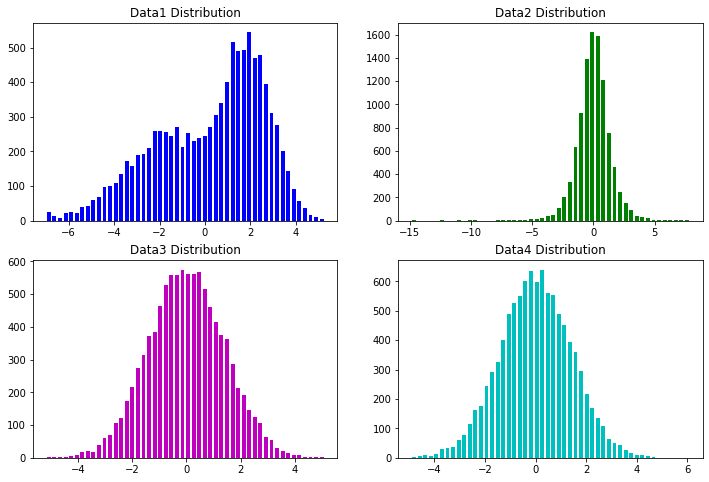

In [ ]:
# Plot of out distribution:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
ax[0,0].hist(df['data1.xslx'], bins=50, color='b',rwidth=0.7)
ax[0,0].set_title("Data1 Distribution")
ax[0,1].hist(df['data2.xslx'], bins=50, color='g',rwidth=0.7)
ax[0,1].set_title("Data2 Distribution")
ax[1,0].hist(df['data3.xslx'], bins=50, color='m',rwidth=0.7)
ax[1,0].set_title("Data3 Distribution")
ax[1,1].hist(df['data4.xslx'], bins=50, color='c',rwidth=0.7)
ax[1,1].set_title("Data4 Distribution")
plt.show()

In [ ]:
print(datasimulated)
dfnew = pd.DataFrame(datasimulated, columns = ["D1","D2","D3","D4"])
dfnew


[[ 0.20797238 -0.04649606  0.03206296  0.04869435]
 [ 0.20797238 -0.04649606  0.03206296  0.04869435]
 [ 0.20797238 -0.04649606  0.03206296  0.04869435]
 ...
 [ 0.20797238 -0.04649606  0.03206296  0.04869435]
 [ 0.20797238 -0.04649606  0.03206296  0.04869435]
 [ 0.20797238 -0.04649606  0.03206296  0.04869435]]


,D1,D2,D3,D4
0,0.207972,-0.046496,0.032063,0.048694
1,0.207972,-0.046496,0.032063,0.048694
2,0.207972,-0.046496,0.032063,0.048694
3,0.207972,-0.046496,0.032063,0.048694
4,0.207972,-0.046496,0.032063,0.048694
...,...,...,...,...
2995,0.207972,-0.046496,0.032063,0.048694
2996,0.207972,-0.046496,0.032063,0.048694
2997,0.207972,-0.046496,0.032063,0.048694
2998,0.207972,-0.046496,0.032063,0.048694


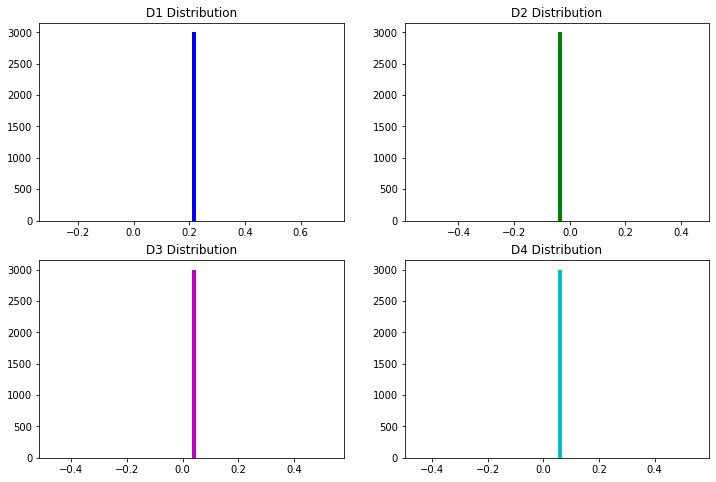

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
ax[0,0].hist(dfnew['D1'], bins=50, color='b',rwidth=0.7)
ax[0,0].set_title("D1 Distribution")
ax[0,1].hist(dfnew['D2'], bins=50, color='g',rwidth=0.7)
ax[0,1].set_title("D2 Distribution")
ax[1,0].hist(dfnew['D3'], bins=50, color='m',rwidth=0.7)
ax[1,0].set_title("D3 Distribution")
ax[1,1].hist(dfnew['D4'], bins=50, color='c',rwidth=0.7)
ax[1,1].set_title("D4 Distribution")
plt.show()

In [ ]:

initial_vectors = data1_test
print(len(initial_vectors))
simulated_vectors = datasimulated
print(len(simulated_vectors))

3000
3000


In [ ]:
import scipy.stats as ss

# Assuming 'initial_vectors' is a 4x10000 numpy array containing the 10000 returns of 4 differents stocks
# and 'simulated_vectors' is a 4xN numpy array containing the 4 simulated vectors with the VAE method
kl_distance = ss.entropy(initial_vectors.flatten(), simulated_vectors.flatten())
print('KL distance:', kl_distance)

KL distance: inf


In [ ]:
cov1 = np.cov(initial_vectors, rowvar=False)
cov2 = np.cov(simulated_vectors, rowvar=False)

In [ ]:
diff = cov1 - cov2
frobenius_norm = np.linalg.norm(diff, 'fro')
print(frobenius_norm)

7.4962473421213165


In [ ]:
import scipy.spatial.distance as ssd
re = ssd.rel_entr(cov1.flatten(), cov2.flatten())
print(re)

[1.30649445e+02            inf 6.54802040e-02            inf
            inf 3.95484991e+01            inf            inf
 6.54802040e-02            inf 4.13141744e+01            inf
            inf            inf            inf 4.50705625e+01]
